In [2]:
import pandas as pd
import json
import os

# Read json from data/ directory
with open(os.path.join('../..', 'data', 'events', '3895052.json')) as f:
    data = json.load(f)


In [36]:
team_id = 904  # replace with your desired team id
player_ids = [player['player']['id'] for x in data[:2] 
              if 'tactics' in x and 'lineup' in x['tactics'] and x['team']['id'] == team_id 
              for player in x['tactics']['lineup']]
print(player_ids)


[8667, 27133, 8221, 30606, 32712, 10336, 28268, 3500, 8804, 40724, 32289]


In [38]:
data[:2]

[{'id': '69bb4fa7-f177-49a8-9b19-7c01cd9d9a9c',
  'index': 1,
  'period': 1,
  'timestamp': '00:00:00.000',
  'minute': 0,
  'second': 0,
  'type': {'id': 35, 'name': 'Starting XI'},
  'possession': 1,
  'possession_team': {'id': 904, 'name': 'Bayer Leverkusen'},
  'play_pattern': {'id': 1, 'name': 'Regular Play'},
  'team': {'id': 904, 'name': 'Bayer Leverkusen'},
  'duration': 0.0,
  'tactics': {'formation': 343,
   'lineup': [{'player': {'id': 8667, 'name': 'Lukáš Hrádecký'},
     'position': {'id': 1, 'name': 'Goalkeeper'},
     'jersey_number': 1},
    {'player': {'id': 27133, 'name': 'Odilon Kossonou'},
     'position': {'id': 3, 'name': 'Right Center Back'},
     'jersey_number': 6},
    {'player': {'id': 8221, 'name': 'Jonathan Tah'},
     'position': {'id': 4, 'name': 'Center Back'},
     'jersey_number': 4},
    {'player': {'id': 30606, 'name': 'Edmond Fayçal Tapsoba'},
     'position': {'id': 5, 'name': 'Left Center Back'},
     'jersey_number': 12},
    {'player': {'id': 32

In [3]:
data[100]

{'id': 'ed61d850-a665-4e5e-a9b4-fa4860cd73a9',
 'index': 101,
 'period': 1,
 'timestamp': '00:01:54.004',
 'minute': 1,
 'second': 54,
 'type': {'id': 30, 'name': 'Pass'},
 'possession': 6,
 'possession_team': {'id': 904, 'name': 'Bayer Leverkusen'},
 'play_pattern': {'id': 1, 'name': 'Regular Play'},
 'team': {'id': 904, 'name': 'Bayer Leverkusen'},
 'player': {'id': 3500, 'name': 'Granit Xhaka'},
 'position': {'id': 11, 'name': 'Left Defensive Midfield'},
 'location': [100.0, 52.5],
 'duration': 0.507662,
 'related_events': ['c9f142b4-0f18-423c-9272-741f44713316'],
 'pass': {'recipient': {'id': 40724, 'name': 'Florian Wirtz'},
  'length': 6.4280634,
  'angle': -1.6642731,
  'height': {'id': 1, 'name': 'Ground Pass'},
  'end_location': [99.4, 46.1],
  'body_part': {'id': 38, 'name': 'Left Foot'}}}

In [4]:
from collections import Counter

Counter([i["type"]["name"] for i in data]) # if data["possession_team"]["id"] == 904

# set([i["type"]["name"] for i in data])

Counter({'Pass': 1081,
         'Ball Receipt*': 1019,
         'Carry': 892,
         'Pressure': 297,
         'Ball Recovery': 87,
         'Duel': 53,
         'Goal Keeper': 33,
         'Block': 32,
         'Foul Committed': 26,
         'Clearance': 26,
         'Dribble': 26,
         'Foul Won': 25,
         'Shot': 25,
         'Interception': 24,
         'Miscontrol': 20,
         'Dispossessed': 19,
         'Dribbled Past': 12,
         'Substitution': 9,
         'Injury Stoppage': 8,
         'Half Start': 4,
         'Referee Ball-Drop': 4,
         'Half End': 4,
         'Shield': 3,
         'Tactical Shift': 3,
         'Starting XI': 2,
         '50/50': 2,
         'Bad Behaviour': 1,
         'Player Off': 1,
         'Player On': 1})

In [24]:
passes_data = [i for i in data if i["type"]["id"] == 30 and i["pass"] and i['team']['id'] == 904]
print(len(passes_data))

481


In [6]:
print(passes_data[0]["location"], passes_data [0]["pass"]["end_location"])

[36.5, 29.6] [35.1, 16.6]


In [7]:
# for ix,pass_info in enumerate(passes_data[12:]):
#     # print(pass["location"], pass["pass"]["end_location"])
#     print(ix, pass_info["pass"]["recipient"])


passes_data[29]

{'id': 'cabe7a89-5bbb-4aff-b7e9-04be4291461c',
 'index': 261,
 'period': 1,
 'timestamp': '00:05:02.162',
 'minute': 5,
 'second': 2,
 'type': {'id': 30, 'name': 'Pass'},
 'possession': 15,
 'possession_team': {'id': 904, 'name': 'Bayer Leverkusen'},
 'play_pattern': {'id': 1, 'name': 'Regular Play'},
 'team': {'id': 904, 'name': 'Bayer Leverkusen'},
 'player': {'id': 8804, 'name': 'Jonas Hofmann'},
 'position': {'id': 17, 'name': 'Right Wing'},
 'location': [69.5, 64.2],
 'duration': 0.453688,
 'related_events': ['db033c3c-c5f2-4c87-b560-27eb9759a6a2'],
 'pass': {'recipient': {'id': 28268, 'name': 'Exequiel Alejandro Palacios'},
  'length': 6.6030297,
  'angle': 3.1112988,
  'height': {'id': 1, 'name': 'Ground Pass'},
  'end_location': [62.9, 64.4],
  'body_part': {'id': 40, 'name': 'Right Foot'}}}

In [8]:
passes_df = pd.DataFrame(
    {
        "id": [i["id"] for i in passes_data],
        "index": [i["index"] for i in passes_data],
        "period": [i["period"] for i in passes_data],
        "timestamp": [i["timestamp"] for i in passes_data],
        "minute": [i["minute"] for i in passes_data],
        "second": [i["second"] for i in passes_data],
        "type_name": [i["type"]["name"] for i in passes_data],
        "type_id": [i["type"]["id"] for i in passes_data],
        "possession": [i["possession"] for i in passes_data],
        "possession_team_id": [i["possession_team"]["id"] for i in passes_data],
        "possession_team_name": [i["possession_team"]["name"] for i in passes_data],
        "play_pattern_id": [i["play_pattern"]["id"] for i in passes_data],
        "play_pattern_name": [i["play_pattern"]["name"] for i in passes_data],
        "team_id": [i["team"]["id"] for i in passes_data],
        "team_name": [i["team"]["name"] for i in passes_data],
        "player_id": [i["player"]["id"] for i in passes_data],
        "player_name": [i["player"]["name"] for i in passes_data],
        "position_id": [i["position"]["id"] for i in passes_data],
        "position_name": [i["position"]["name"] for i in passes_data],
        "location_x": [i["location"][0] for i in passes_data],
        "location_y": [i["location"][1] for i in passes_data],
        "duration": [i["duration"] for i in passes_data],
        "pass_recipient_id": [i["pass"].get("recipient", {}).get("id", None) for i in passes_data],
        "pass_recipient_name": [i["pass"].get("recipient", {}).get("name", None) for i in passes_data],
        "pass_length": [i["pass"]["length"] for i in passes_data],
        "pass_angle": [i["pass"]["angle"] for i in passes_data],
        "pass_height_id": [i["pass"]["height"]["id"] for i in passes_data],
        "pass_height_name": [i["pass"]["height"]["name"] for i in passes_data],
        "pass_end_location_x": [i["pass"]["end_location"][0] for i in passes_data],
        "pass_end_location_y": [i["pass"]["end_location"][1] for i in passes_data], 
        "pass_outcome_id": [i["pass"].get("outcome", {}).get("id", None) for i in passes_data],
        "pass_outcome_name": [i["pass"].get("outcome", {}).get("name", None) for i in passes_data],
    }
)


In [9]:
passes_df

,id,index,period,timestamp,minute,second,type_name,type_id,possession,possession_team_id,...,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location_x,pass_end_location_y,pass_outcome_id,pass_outcome_name
0,a6f33202-5449-458f-8473-9c4274528e11,26,1,00:00:20.033,0,20,Pass,30,2,182,...,30606.0,Edmond Fayçal Tapsoba,13.075168,-1.678075,2,Low Pass,35.1,16.6,9.0,Incomplete
1,6aa04e2b-f226-4e4c-84a1-6438d188c9a6,96,1,00:01:52.588,1,52,Pass,30,6,904,...,40724.0,Florian Wirtz,16.302454,-1.348135,1,Ground Pass,98.0,45.7,NaN,None
2,97d8e43c-7f14-4447-ae06-290765162250,98,1,00:01:53.452,1,53,Pass,30,6,904,...,3500.0,Granit Xhaka,6.802940,1.541393,1,Ground Pass,99.2,52.5,NaN,None
3,ed61d850-a665-4e5e-a9b4-fa4860cd73a9,101,1,00:01:54.004,1,54,Pass,30,6,904,...,40724.0,Florian Wirtz,6.428063,-1.664273,1,Ground Pass,99.4,46.1,NaN,None
4,8861d98d-8203-4cf2-a8cd-292630b66f01,118,1,00:02:17.739,2,17,Pass,30,9,904,...,8804.0,Jonas Hofmann,12.242957,-0.350167,2,Low Pass,92.2,63.8,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5fa3d180-036a-40fb-acb5-f9d376cad1ef,3669,2,00:48:45.365,93,45,Pass,30,176,904,...,8403.0,Nadiem Amiri,7.800000,0.394791,1,Ground Pass,112.3,77.0,NaN,None
477,1dd1df6b-d3c3-4767-aa7e-e6a6fb330496,3673,2,00:48:50.108,93,50,Pass,30,176,904,...,NaN,None,3.423449,-1.687905,2,Low Pass,117.5,76.1,9.0,Incomplete
478,43a9b3ef-649c-457d-88c1-ec5c6e74b41f,3675,2,00:49:33.922,94,33,Pass,30,177,904,...,28239.0,Adam Hložek,4.686150,-2.446854,1,Ground Pass,116.4,77.0,NaN,None
479,d0488ae0-4041-4e6a-a9f8-8b1182c02689,3721,2,00:50:26.395,95,26,Pass,30,179,904,...,NaN,None,10.602358,1.132460,1,Ground Pass,96.5,22.4,9.0,Incomplete


In [10]:
data[0]

{'id': '69bb4fa7-f177-49a8-9b19-7c01cd9d9a9c',
 'index': 1,
 'period': 1,
 'timestamp': '00:00:00.000',
 'minute': 0,
 'second': 0,
 'type': {'id': 35, 'name': 'Starting XI'},
 'possession': 1,
 'possession_team': {'id': 904, 'name': 'Bayer Leverkusen'},
 'play_pattern': {'id': 1, 'name': 'Regular Play'},
 'team': {'id': 904, 'name': 'Bayer Leverkusen'},
 'duration': 0.0,
 'tactics': {'formation': 343,
  'lineup': [{'player': {'id': 8667, 'name': 'Lukáš Hrádecký'},
    'position': {'id': 1, 'name': 'Goalkeeper'},
    'jersey_number': 1},
   {'player': {'id': 27133, 'name': 'Odilon Kossonou'},
    'position': {'id': 3, 'name': 'Right Center Back'},
    'jersey_number': 6},
   {'player': {'id': 8221, 'name': 'Jonathan Tah'},
    'position': {'id': 4, 'name': 'Center Back'},
    'jersey_number': 4},
   {'player': {'id': 30606, 'name': 'Edmond Fayçal Tapsoba'},
    'position': {'id': 5, 'name': 'Left Center Back'},
    'jersey_number': 12},
   {'player': {'id': 32712, 'name': 'Jeremie Frim

In [11]:
players_data = []  # list to hold all player data

# iterate over the events data (replace events_data with your actual data variable)
for event in data[:2]:
    if 'tactics' in event:
        team_id = event['team']['id']
        team_name = event['team']['name']
        formation = event['tactics']['formation']
        
        # iterate over the lineup
        for player in event['tactics']['lineup']:
            player_id = player['player']['id']
            player_name = player['player']['name']
            position_id = player['position']['id']
            position_name = player['position']['name']
            jersey_number = player['jersey_number']
            
            # append player data to the list
            players_data.append([player_id, player_name, position_id, position_name, jersey_number, team_id, team_name, formation])

# create dataframe
players_df = pd.DataFrame(players_data, columns=['player_id', 'player_name', 'position_id', 'position_name', 'jersey_number', 'team_id', 'team_name', 'formation'])

formation_dict = {1: 'GK', 2: 'RB', 3: 'RCB', 4: 'CB', 5: 'LCB', 6: 'LB', 7: 'RWB',
                  8: 'LWB', 9: 'RDM', 10: 'CDM', 11: 'LDM', 12: 'RM', 13: 'RCM',
                  14: 'CM', 15: 'LCM', 16: 'LM', 17: 'RW', 18: 'RAM', 19: 'CAM',
                  20: 'LAM', 21: 'LW', 22: 'RCF', 23: 'ST', 24: 'LCF', 25: 'SS'}

players_df['position_abbreviation'] = players_df.position_id.map(formation_dict)


In [12]:
players_df

,player_id,player_name,position_id,position_name,jersey_number,team_id,team_name,formation,position_abbreviation
0,8667,Lukáš Hrádecký,1,Goalkeeper,1,904,Bayer Leverkusen,343,GK
1,27133,Odilon Kossonou,3,Right Center Back,6,904,Bayer Leverkusen,343,RCB
2,8221,Jonathan Tah,4,Center Back,4,904,Bayer Leverkusen,343,CB
3,30606,Edmond Fayçal Tapsoba,5,Left Center Back,12,904,Bayer Leverkusen,343,LCB
4,32712,Jeremie Frimpong,7,Right Wing Back,30,904,Bayer Leverkusen,343,RWB
5,10336,Alejandro Grimaldo García,8,Left Wing Back,20,904,Bayer Leverkusen,343,LWB
6,28268,Exequiel Alejandro Palacios,9,Right Defensive Midfield,25,904,Bayer Leverkusen,343,RDM
7,3500,Granit Xhaka,11,Left Defensive Midfield,34,904,Bayer Leverkusen,343,LDM
8,8804,Jonas Hofmann,17,Right Wing,7,904,Bayer Leverkusen,343,RW
9,40724,Florian Wirtz,21,Left Wing,10,904,Bayer Leverkusen,343,LW


In [13]:
substitutions_data = []  # list to hold all substitution data

# iterate over the events data (replace events_data with your actual data variable)
for event in data:
    if event['type']['id'] == 19:
        team_id = event['team']['id']
        team_name = event['team']['name']
        player_out_id = event['player']['id']
        player_out_name = event['player']['name']
        player_in_id = event['substitution']['replacement']['id']
        player_in_name = event['substitution']['replacement']['name']
        minute = event['minute']
        
        # append substitution data to the list
        substitutions_data.append([team_id, team_name, player_out_id, player_out_name, player_in_id, player_in_name, minute])

# create dataframe
substitutions_df = pd.DataFrame(substitutions_data, columns=['team_id', 'team_name', 'player_out_id', 'player_out_name', 'player_in_id', 'player_in_name', 'minute'])


In [37]:
[x['substitution']['replacement']['id'] for x in data if x['type']['id'] == 19]

[8222, 40185, 5536, 9195, 5625, 196651, 74659, 28239, 8403]

In [14]:
substitutions_df

,team_id,team_name,player_out_id,player_out_name,player_in_id,player_in_name,minute
0,182,RB Leipzig,39167,Xavi Simons,8222,Kevin Kampl,61
1,182,RB Leipzig,39460,Nicolas Seiwald,40185,Junior Castello Lukeba,61
2,182,RB Leipzig,5557,Timo Werner,5536,Yussuf Yurary Poulsen,61
3,904,Bayer Leverkusen,40724,Florian Wirtz,9195,Robert Andrich,74
4,182,RB Leipzig,16275,Ikoma Loïs Openda,5625,Emil Peter Forsberg,74
5,904,Bayer Leverkusen,32712,Jeremie Frimpong,196651,Arthur Augusto de Matos Soares,77
6,182,RB Leipzig,8769,Xaver Schlager,74659,Fabio Carvalho,83
7,904,Bayer Leverkusen,8804,Jonas Hofmann,28239,Adam Hložek,88
8,904,Bayer Leverkusen,32289,Victor Okoh Boniface,8403,Nadiem Amiri,88


# Pass Network

In [15]:
passes_df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type_name',
       'type_id', 'possession', 'possession_team_id', 'possession_team_name',
       'play_pattern_id', 'play_pattern_name', 'team_id', 'team_name',
       'player_id', 'player_name', 'position_id', 'position_name',
       'location_x', 'location_y', 'duration', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'pass_end_location_x', 'pass_end_location_y',
       'pass_outcome_id', 'pass_outcome_name'],
      dtype='object')

In [16]:
passers_avg_location = passes_df.groupby(['player_id']).agg(
    {
        'location_x': 'mean',
        'location_y': 'mean',
        'id': 'count'
    }
).reset_index().rename(columns={'location_x': 'x', 'location_y': 'y', 'id': 'passes_given'})

recipients_count = passes_df.groupby(['pass_recipient_id']).agg(
    {
        'id': 'count'
    }
).reset_index().rename(columns={'id': 'passes_received'})

# merge the two dataframes
passers_avg_location = passers_avg_location.merge(recipients_count, left_on='player_id', right_on='pass_recipient_id', how='left').drop(columns=['pass_recipient_id'])
# Sum the passes given and received
passers_avg_location['total_passes'] = passers_avg_location['passes_given'] + passers_avg_location['passes_received']
# Force player_id to string
passers_avg_location['player_id'] = passers_avg_location['player_id'].astype(str)

passers_avg_location

,player_id,x,y,passes_given,passes_received,total_passes
0,3500,62.166667,29.581250,48,50,98
1,8221,46.846154,47.169231,52,41,93
2,8403,97.820000,72.380000,5,5,10
3,8667,12.342308,39.276923,26,10,36
4,8804,79.917500,54.115000,40,47,87
5,9195,46.875000,40.175000,4,4,8
6,10336,67.356098,11.709756,41,31,72
7,27133,51.542308,63.113462,52,32,84
8,28239,77.100000,53.975000,4,7,11
9,28268,67.119697,46.150000,66,59,125


In [26]:
passers_avg_location.player_id.nunique()

15

In [17]:
# create a temporary dataframe with sorted player_id and pass_recipient_id
temp_df = passes_df[['player_id', 'pass_recipient_id']].apply(lambda x: sorted(x), axis=1, result_type='expand')

# rename the columns
temp_df.columns = ['player1', 'player2']

# add the 'id' column from the original dataframe
temp_df['id'] = passes_df['id']

# now groupby 'player1' and 'player2' and count the number of 'id'
passes_between = temp_df.groupby(['player1', 'player2']).agg(
    {
        'id': 'count'
    }
).reset_index()

# rename the columns back to 'player_id' and 'pass_recipient_id'
passes_between.rename(columns={'player1': 'player_id', 'player2': 'pass_recipient_id', 'id': 'pass_count'}, inplace=True)

# Transform player_id and pass_rcipient_id back to string, without .0
passes_between['player_id'] = passes_between['player_id'].astype(int).astype(str)
passes_between['pass_recipient_id'] = passes_between['pass_recipient_id'].astype(int).astype(str)


In [18]:
passes_between

,player_id,pass_recipient_id,pass_count
0,3500,8221,9
1,3500,8667,1
2,3500,8804,4
3,3500,9195,1
4,3500,10336,12
...,...,...,...
65,30606,32289,4
66,30606,40724,7
67,32289,32712,8
68,32289,40724,5


In [19]:
# Merge the passes_between dataframe with the passers_avg_location dataframe
passes_between = (
    passes_between
        .merge(passers_avg_location[["player_id", "x", "y"]], left_on='player_id', right_on='player_id', how='left')
        .merge(passers_avg_location[["player_id", "x", "y"]].rename(columns={"x":"x_end", "y":"y_end"}), left_on='pass_recipient_id', right_on='player_id', how='left')
        .drop(columns='player_id_y')
        .rename(columns={'player_id_x': 'player_id'})
)
# passes_between


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

from mplsoccer import Pitch, FontManager

Text(0.5, 0.25, 'RB Leipzig')

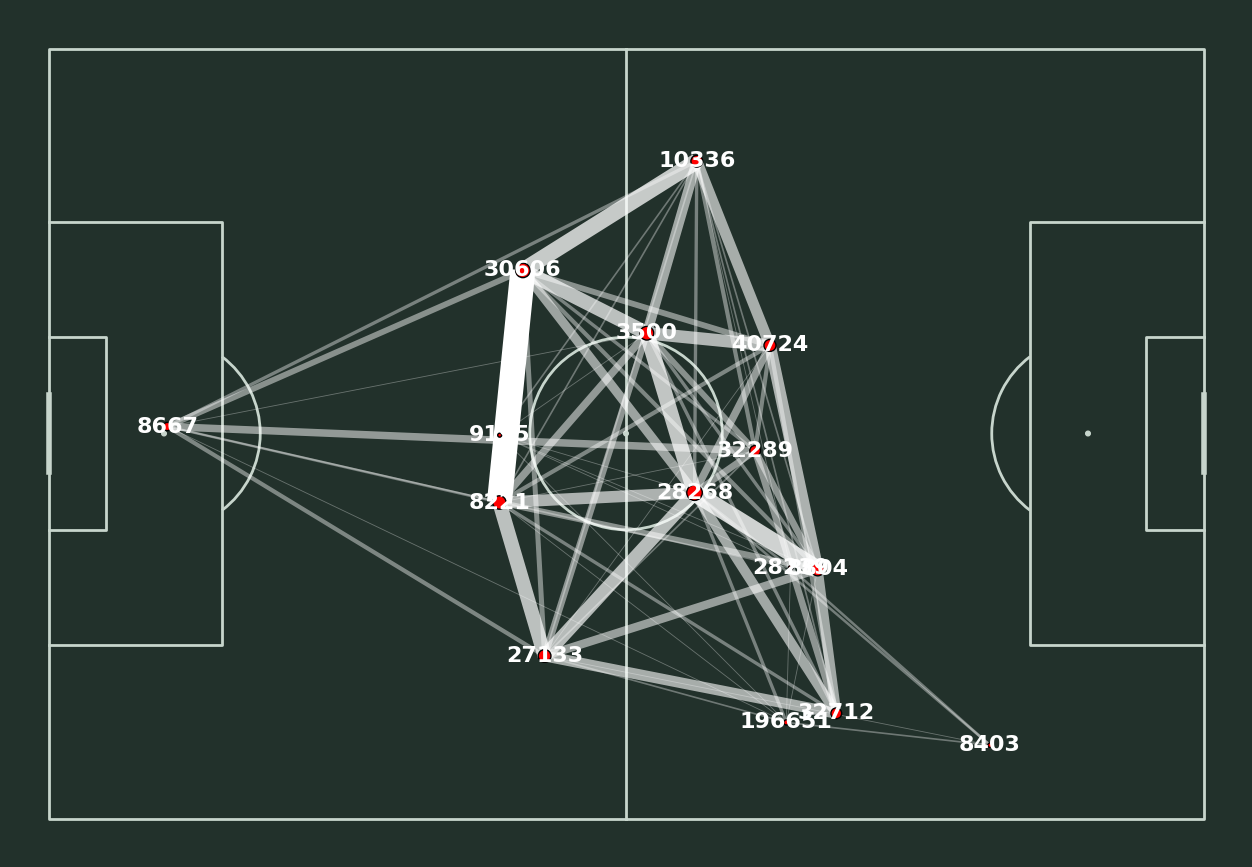

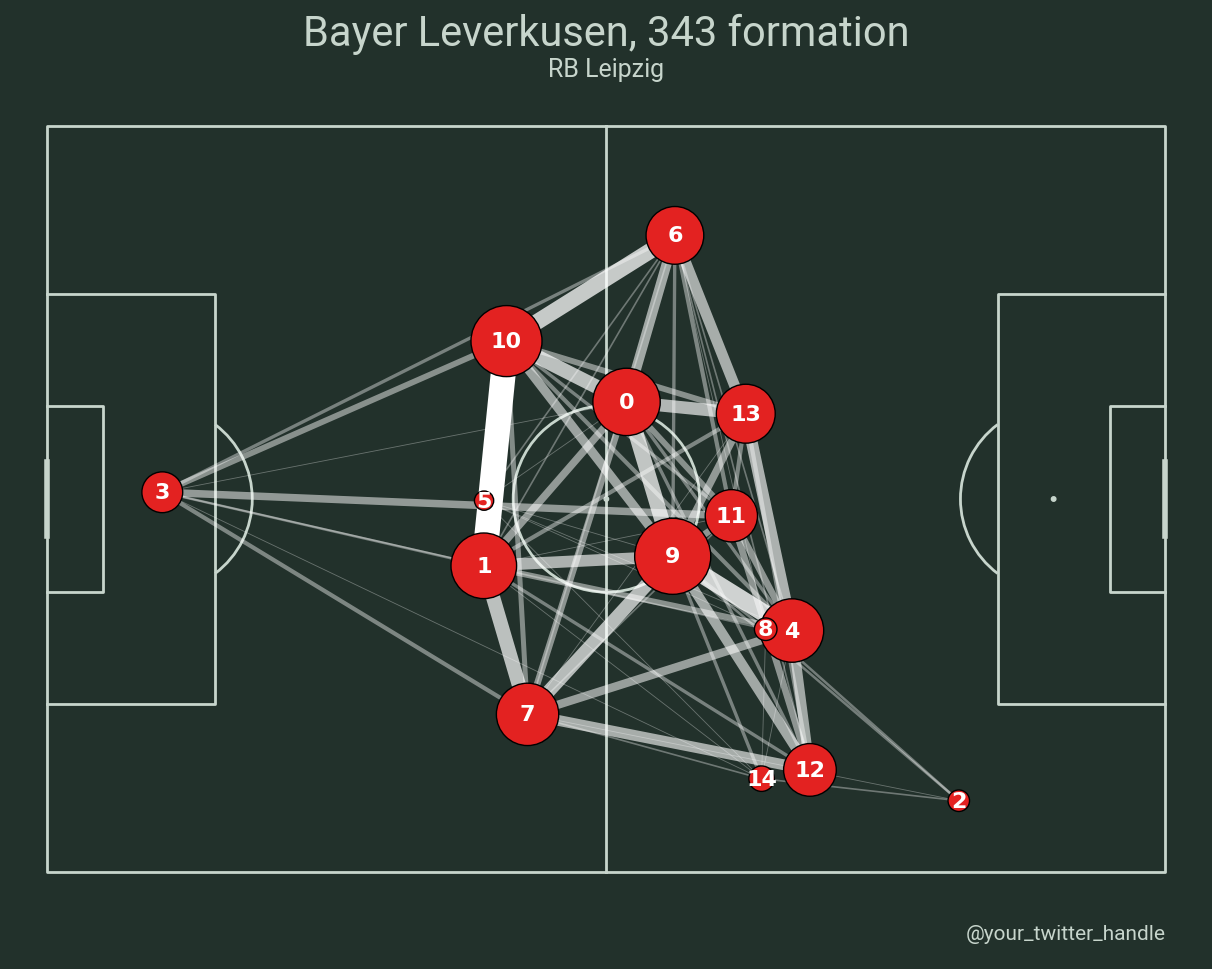

In [21]:
MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('white'))
color = np.tile(color, (len(passes_between), 1))
c_transparency = passes_between.pass_count / passes_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

TEAM = 'Bayer Leverkusen'
OPPONENT = 'RB Leipzig'
FORMATION = '343'
MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
passes_between['width'] = (passes_between.pass_count / passes_between.pass_count.max() *
                           MAX_LINE_WIDTH)
passers_avg_location['marker_size'] = (passers_avg_location['total_passes']
                                         / passers_avg_location['total_passes'].max() * MAX_MARKER_SIZE)

pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor("#22312b")
pass_lines = pitch.lines(passes_between.x, passes_between.y,
                         passes_between.x_end, passes_between.y_end, lw=passes_between.width,
                         color=color, zorder=1, ax=ax)
pass_nodes = pitch.scatter(passers_avg_location.x, passers_avg_location.y,
                           s=passers_avg_location.total_passes,
                           color='red', edgecolors='black', linewidth=1, alpha=1, ax=ax)
for index, row in passers_avg_location.iterrows():
    pitch.annotate(row.player_id, xy=(row.x, row.y), c='white', va='center',
                   ha='center', size=16, weight='bold', ax=ax)

fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_space=0, grid_height=0.82, endnote_height=0.05)
fig.set_facecolor("#22312b")
pass_lines = pitch.lines(passes_between.x, passes_between.y,
                         passes_between.x_end, passes_between.y_end, lw=passes_between.width,
                         color=color, zorder=1, ax=axs['pitch'])
pass_nodes = pitch.scatter(passers_avg_location.x, passers_avg_location.y,
                           s=passers_avg_location.marker_size,
                           color='#E32221', edgecolors='black', linewidth=1, alpha=1, ax=axs['pitch'])
for index, row in passers_avg_location.iterrows():
    pitch.annotate(row.name, xy=(row.x, row.y), c='white', va='center',
                   ha='center', size=16, weight='bold', ax=axs['pitch'])

# Load a custom font.
URL = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Regular.ttf'
robotto_regular = FontManager(URL)

# endnote /title
axs['endnote'].text(1, 0.5, '@your_twitter_handle', color='#c7d5cc',
                    va='center', ha='right', fontsize=15,
                    fontproperties=robotto_regular.prop)
TITLE_TEXT = f'{TEAM}, {FORMATION} formation'
axs['title'].text(0.5, 0.7, TITLE_TEXT, color='#c7d5cc',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=30)
axs['title'].text(0.5, 0.25, OPPONENT, color='#c7d5cc',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=18)

# sphinx_gallery_thumbnail_path = 'gallery/pitch_plots/images/sphx_glr_plot_pass_network_002.png'

In [22]:

passers_avg_location

,player_id,x,y,passes_given,passes_received,total_passes,marker_size
0,3500,62.166667,29.581250,48,50,98,2352.0
1,8221,46.846154,47.169231,52,41,93,2232.0
2,8403,97.820000,72.380000,5,5,10,240.0
3,8667,12.342308,39.276923,26,10,36,864.0
4,8804,79.917500,54.115000,40,47,87,2088.0
5,9195,46.875000,40.175000,4,4,8,192.0
6,10336,67.356098,11.709756,41,31,72,1728.0
7,27133,51.542308,63.113462,52,32,84,2016.0
8,28239,77.100000,53.975000,4,7,11,264.0
9,28268,67.119697,46.150000,66,59,125,3000.0


In [23]:
passes_between

,player_id,pass_recipient_id,pass_count,x,y,x_end,y_end,width
0,3500,8221,9,62.166667,29.581250,46.846154,47.169231,5.4
1,3500,8667,1,62.166667,29.581250,12.342308,39.276923,0.6
2,3500,8804,4,62.166667,29.581250,79.917500,54.115000,2.4
3,3500,9195,1,62.166667,29.581250,46.875000,40.175000,0.6
4,3500,10336,12,62.166667,29.581250,67.356098,11.709756,7.2
...,...,...,...,...,...,...,...,...
65,30606,32289,4,49.283051,23.054237,73.415000,41.800000,2.4
66,30606,40724,7,49.283051,23.054237,74.960000,30.846667,4.2
67,32289,32712,8,73.415000,41.800000,81.848148,69.074074,4.8
68,32289,40724,5,73.415000,41.800000,74.960000,30.846667,3.0


In [39]:
players_df

,player_id,player_name,position_id,position_name,jersey_number,team_id,team_name,formation,position_abbreviation
0,8667,Lukáš Hrádecký,1,Goalkeeper,1,904,Bayer Leverkusen,343,GK
1,27133,Odilon Kossonou,3,Right Center Back,6,904,Bayer Leverkusen,343,RCB
2,8221,Jonathan Tah,4,Center Back,4,904,Bayer Leverkusen,343,CB
3,30606,Edmond Fayçal Tapsoba,5,Left Center Back,12,904,Bayer Leverkusen,343,LCB
4,32712,Jeremie Frimpong,7,Right Wing Back,30,904,Bayer Leverkusen,343,RWB
5,10336,Alejandro Grimaldo García,8,Left Wing Back,20,904,Bayer Leverkusen,343,LWB
6,28268,Exequiel Alejandro Palacios,9,Right Defensive Midfield,25,904,Bayer Leverkusen,343,RDM
7,3500,Granit Xhaka,11,Left Defensive Midfield,34,904,Bayer Leverkusen,343,LDM
8,8804,Jonas Hofmann,17,Right Wing,7,904,Bayer Leverkusen,343,RW
9,40724,Florian Wirtz,21,Left Wing,10,904,Bayer Leverkusen,343,LW
